In [1]:
import pandas as pd
import numpy as np

In [2]:
heart=pd.read_csv('heart.csv')

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(heart.drop(columns=['target']), heart['target'],
                 test_size=0.2, random_state=1984)

In [7]:
heart.info
y_train.info

<bound method Series.info of 162    1
227    0
224    0
142    1
43     1
      ..
281    0
243    0
255    0
111    1
220    0
Name: target, Length: 242, dtype: int64>

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=25)

In [9]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=25)

In [10]:
accuracy_decision_tree = tree.score(X_test,y_test)

In [11]:
print("the accuracy of decision tree is equal to: " + str(accuracy_decision_tree))

the accuracy of decision tree is equal to: 0.7377049180327869


In [12]:
tree.score(X_train,y_train)


1.0

In [13]:
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier is the KNN machine learning algorithem
KNN = KNeighborsClassifier(n_neighbors=3)

In [14]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
KNN.score(X_test,y_test)


0.6557377049180327

In [29]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=25, n_estimators=50,n_jobs=-1, criterion='gini', max_depth=4)
forest.fit(X_train,y_train)
forest.score(X_test,y_test)


0.8360655737704918

In [30]:
forest.score(X_train,y_train)

0.9132231404958677

In [ ]:
forest.feature_importances_

array([0.06558786, 0.02996531, 0.15934392, 0.04248478, 0.049302  ,
       0.00369585, 0.01072217, 0.10304281, 0.04131319, 0.13948351,
       0.08831467, 0.13420463, 0.13253929])

In [32]:
import matplotlib.pyplot as plt

In [33]:
n_features=X_train.shape[1]
np.arange(n_features)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Text(0, 0.5, 'feature names')

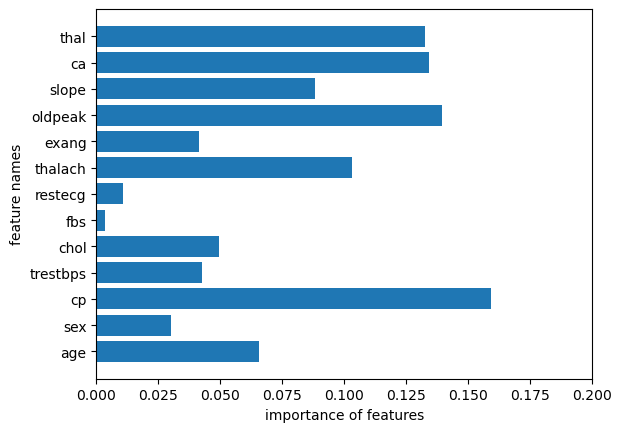

In [34]:
plt.barh(range(n_features),forest.feature_importances_)
plt.yticks(ticks=np.arange(n_features), labels=X_train.columns)
plt.xlim(right=0.2) 
plt.show
plt.xlabel("importance of features")
plt.ylabel("feature names")

Text(0, 0.5, 'feature names')

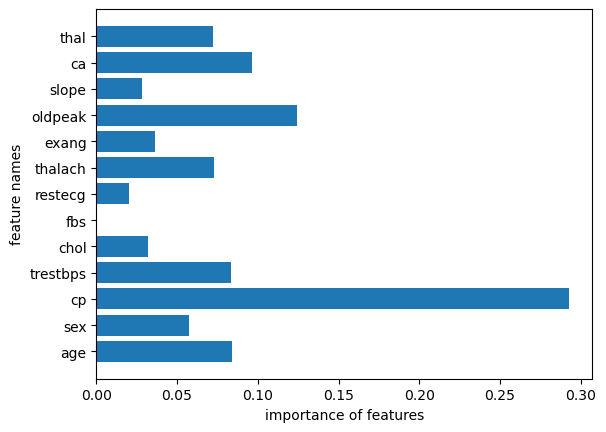

In [35]:
plt.barh(range(n_features),tree.feature_importances_)
plt.yticks(ticks=np.arange(n_features), labels=X_train.columns)
#plt.xlim(right=0.2) 
plt.show
plt.xlabel("importance of features")
plt.ylabel("feature names")

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbtree = GradientBoostingClassifier(learning_rate=0.1, 
                                    max_depth=1, random_state=25, )
gbtree.fit(X_train, y_train)
gbtree_score_test=gbtree.score(X_test,y_test)
gbtree_score_train=gbtree.score(X_train,y_train)

print("score of gntree in training data is " + str(gbtree_score_train))
print("score of gbtree in testing data is " + str(gbtree_score_test))

score of gntree in training data is 0.9090909090909091
score of gbtree in testing data is 0.8360655737704918


Text(0, 0.5, 'feature names')

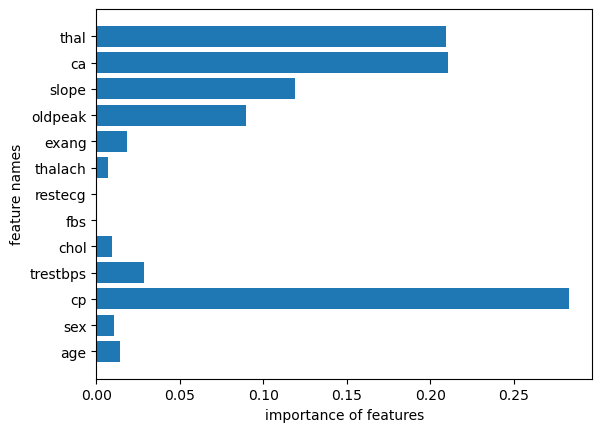

In [37]:
plt.barh(range(n_features),gbtree.feature_importances_)
plt.yticks(ticks=np.arange(n_features), labels=X_train.columns)
#plt.xlim(right=0.2) 
plt.show
plt.xlabel("importance of features")
plt.ylabel("feature names")

In [38]:
import xgboost as xgb

In [56]:
train = xgb.DMatrix(X_train[['thal', 'ca', 'slope', 'oldpeak', 'exang', 'thalach', 'chol', 'trestbps', 'cp', 'sex', 'age']], label=y_train)
test = xgb.DMatrix(X_test[['thal', 'ca', 'slope', 'oldpeak', 'exang', 'thalach', 'chol', 'trestbps', 'cp', 'sex', 'age']], label=y_test)
params = {
    'max_depth' : 7,
    'eta' : 0.1,
    'objective': 'binary:hinge',
    'n_estimators': 50 
}
epochs = 100 
XGB_model=xgb.train(params,train,epochs)
XGB_prediction=XGB_model.predict(test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,XGB_prediction)

0.7868852459016393

In [49]:
X_train[['thal', 'ca', 'slope', 'oldpeak', 'exang', 'thalach', 'chol', 'trestbps', 'cp', 'sex', 'age']]

,thal,ca,slope,oldpeak,exang,thalach,chol,trestbps,cp,sex,age
162,2,0,2,0.0,0,182,157,120,1,1,41
227,3,0,1,1.6,1,130,198,120,0,1,35
224,3,1,1,2.8,1,126,239,110,0,1,54
142,2,0,1,0.0,0,173,209,120,2,0,42
43,2,0,1,0.4,0,143,264,130,0,0,53
...,...,...,...,...,...,...,...,...,...,...,...
281,0,0,1,1.0,1,156,204,128,0,1,52
243,3,1,1,1.2,1,88,274,152,0,1,57
255,3,3,1,0.0,1,147,309,142,0,1,45
111,3,1,2,0.2,0,173,126,150,2,1,57


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbtree = GradientBoostingClassifier(learning_rate=0.2, max_depth=2, random_state=1984)
gbtree.fit(X_train,y_train)
gbtree_score_test=gbtree.score(X_test, y_test)
gbtree_score_train=gbtree.score(X_train, y_train)
print ("score of gbtree in training data is " + str(gbtree_score_train))
print ("score of gbtree in testing data is " + str(gbtree_score_test))

score of gbtree in training data is 0.9917355371900827
score of gbtree in testing data is 0.7704918032786885


Text(0, 0.5, 'feature names')

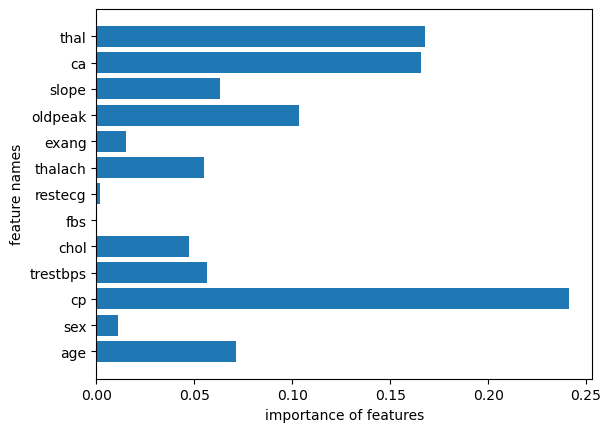

In [121]:
plt.barh(range(n_features),gbtree.feature_importances_)
plt.yticks(ticks=np.arange(n_features), labels=X_train.columns)
#plt.xlim(right=0.2) 
plt.show
plt.xlabel("importance of features")
plt.ylabel("feature names")

In [176]:
#XGBPOOST example:

#you first need to install XGBOOST on anacanda. 
#To do so, go to the prgorams and start ANACANDA PROMPT once the window is open type:
#pip install xgboost

import xgboost as xgb


In [177]:
#before you can train xgboost, you need to change data into a DMatrix
train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [206]:
#now we have to define the hyperparameter values for XGBOOST
param = {
    'max_depth' : 2,
    'eta' : 0.2,
    'objective' : 'binary:hinge'
}
epochs = 1000

In [207]:
model = xgb.train(param, train, epochs)

In [208]:
tesing_predictions = model.predict(test)
print (tesing_predictions)

training_predictions = model.predict(train)


[0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.]


In [209]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,tesing_predictions)

0.7868852459016393

In [210]:
accuracy_score(y_train, training_predictions)

1.0

In [8]:
import xgboost as xgb
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=4, noise=0.1)

model = xgb.XGBRegressor(base_score=10.0)
model.fit(X, y)

# Default base_score
print("Default base score (regression):", model.get_params()['base_score'])


Default base score (regression): 10.0


In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=4, n_classes=2)

model = xgb.XGBClassifier()
model.fit(X, y)

# Default base_score (log-odds of class probability)
print("Default base score (classification):", model.get_params()['base_score'])


Default base score (classification): None
